In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('seaborn-v0_8')

In [3]:
data = yf.download(["AAPL", "MSFT"], start="2010-01-01", end="2023-01-01")

C:\Users\darak\AppData\Local\Temp\ipykernel_24840\1876134867.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["AAPL", "MSFT"], start="2010-01-01", end="2023-01-01")
[*********************100%***********************]  2 of 2 completed


In [9]:
tickers = ["AAPL", "MSFT"]

data = yf.download (tickers, start="2010-01-01", end="2023-01-01", group_by = 'ticker', auto_adjust=True)
close_prices = data.xs("Close", level="Price", axis=1)
close_prices.head()


[*********************100%***********************]  2 of 2 completed


Ticker,MSFT,AAPL
Date,,
2010-01-04,23.130051,6.418381
2010-01-05,23.137527,6.429482
2010-01-06,22.995535,6.327213
2010-01-07,22.756392,6.315513
2010-01-08,22.913324,6.357500


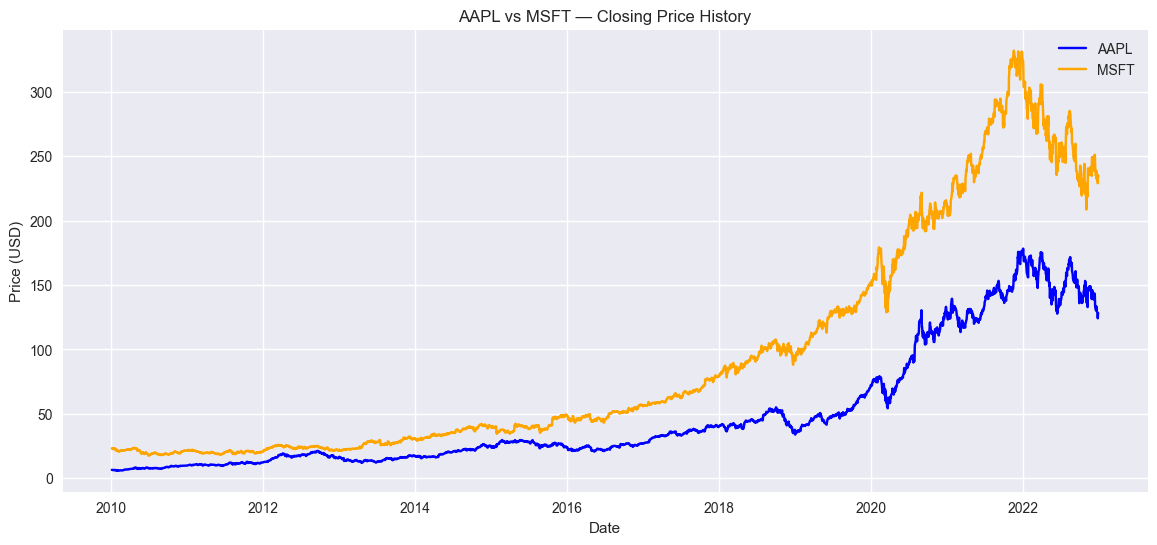

In [10]:
plt.figure(figsize=(14, 6))

plt.plot(close_prices.index, close_prices["AAPL"], label="AAPL", color='blue')
plt.plot(close_prices.index, close_prices["MSFT"], label="MSFT", color='orange')
plt.title("AAPL vs MSFT — Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = close_prices["AAPL"]
series.head()

Date
2010-01-04    6.418381
2010-01-05    6.429482
2010-01-06    6.327213
2010-01-07    6.315513
2010-01-08    6.357500
Name: AAPL, dtype: float64

In [17]:
result = adfuller(series.dropna())
print("ADF Statistic:", result[1])
print("p-value:", result[1])

ADF Statistic: 0.9363667857873598
p-value: 0.9363667857873598


<Figure size 1400x700 with 0 Axes>

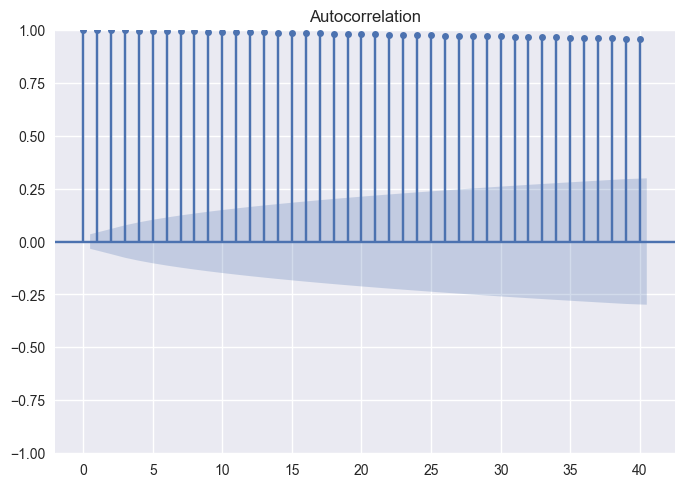

<Figure size 1400x700 with 0 Axes>

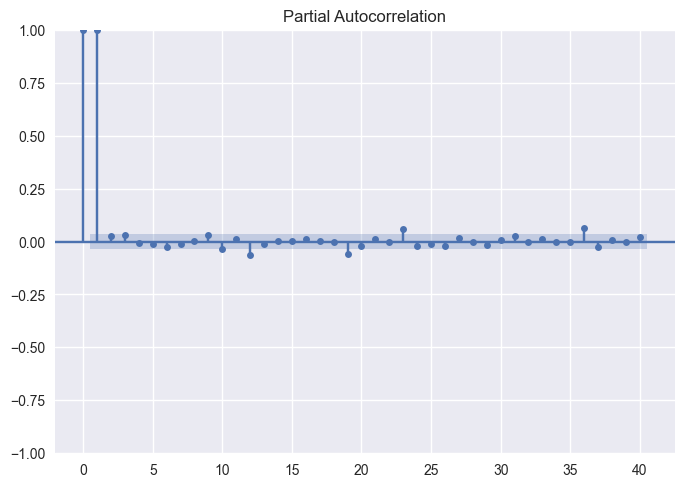

In [20]:
plt.figure(figsize=(14, 7))
plot_acf(series.dropna(), lags=40)
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(series.dropna(), lags=40)
plt.show()

In [21]:
diff_series = series.diff().dropna()

diff_series.head()

Date
2010-01-05    0.011100
2010-01-06   -0.102269
2010-01-07   -0.011700
2010-01-08    0.041987
2010-01-11   -0.056082
Name: AAPL, dtype: float64

In [22]:
result2 = adfuller(diff_series)
print("ADF Statistic (after differencing):", result2[0])
print("p-value (after differencing):", result2[1])


ADF Statistic (after differencing): -11.591567264565297
p-value (after differencing): 2.7838242148549788e-21


<Figure size 1400x500 with 0 Axes>

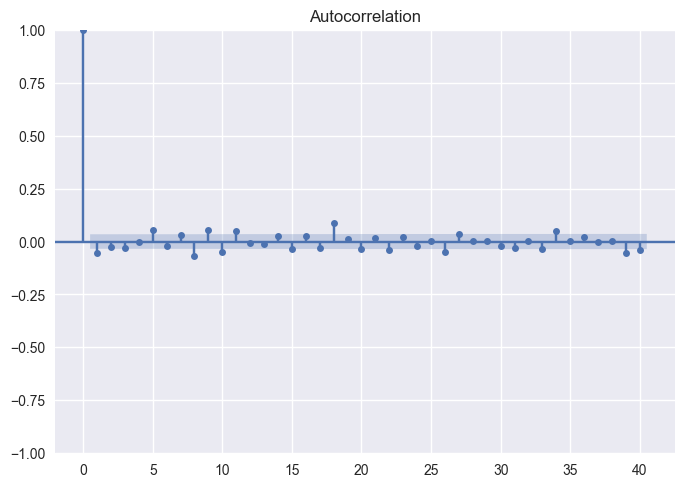

<Figure size 1400x500 with 0 Axes>

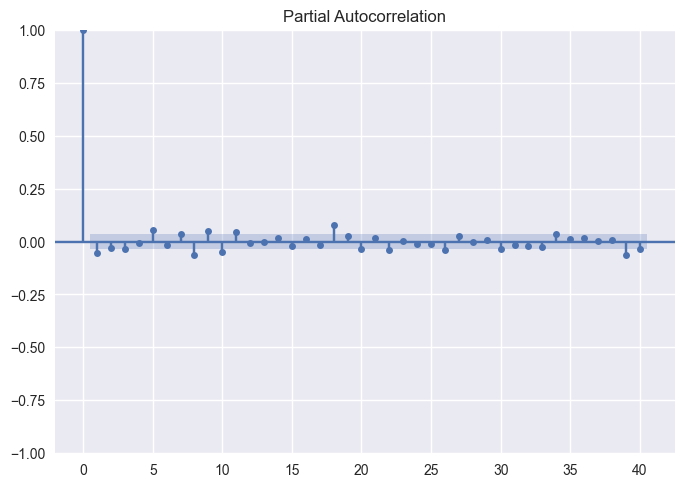

In [23]:
plt.figure(figsize=(14,5))
plot_acf(diff_series, lags=40)
plt.show()

plt.figure(figsize=(14,5))
plot_pacf(diff_series, lags=40)
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(series, order=(1,1,0))
model_fit = model.fit()

model_fit.summary()

c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                 3272
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5663.950
Date:                Fri, 21 Nov 2025   AIC                          11331.899
Time:                        12:57:09   BIC                          11344.085
Sample:                             0   HQIC                         11336.263
                               - 3272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.008     -7.023      0.000      -0.070      -0.039
sigma2         1.8687      0.017    109.979      0.000       1.835       1.902
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             24088.94
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              94.87   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
series = close_prices["AAPL"]


train_size = int(len(series) * 0.8)  
train, test = series.iloc[:train_size], series.iloc[train_size:]

len(train), len(test)

(2617, 655)

In [27]:
from statsmodels.tsa.arima.model import ARIMA  

model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()
model_fit.summary()


c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                 2617
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2483.051
Date:                Fri, 21 Nov 2025   AIC                           4970.102
Time:                        13:07:00   BIC                           4981.841
Sample:                             0   HQIC                          4974.354
                               - 2617                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1834      0.005    -34.005      0.000      -0.194      -0.173
sigma2         0.3908      0.003    136.001      0.000       0.385       0.396
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            108921.21
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              17.33   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:

n_test = len(test)

forecast = model_fit.forecast(steps=n_test)

forecast.index = test.index

forecast.head()


c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Date
2020-05-28    77.082436
2020-05-29    77.093691
2020-06-01    77.091627
2020-06-02    77.092005
2020-06-03    77.091936
Name: predicted_mean, dtype: float64

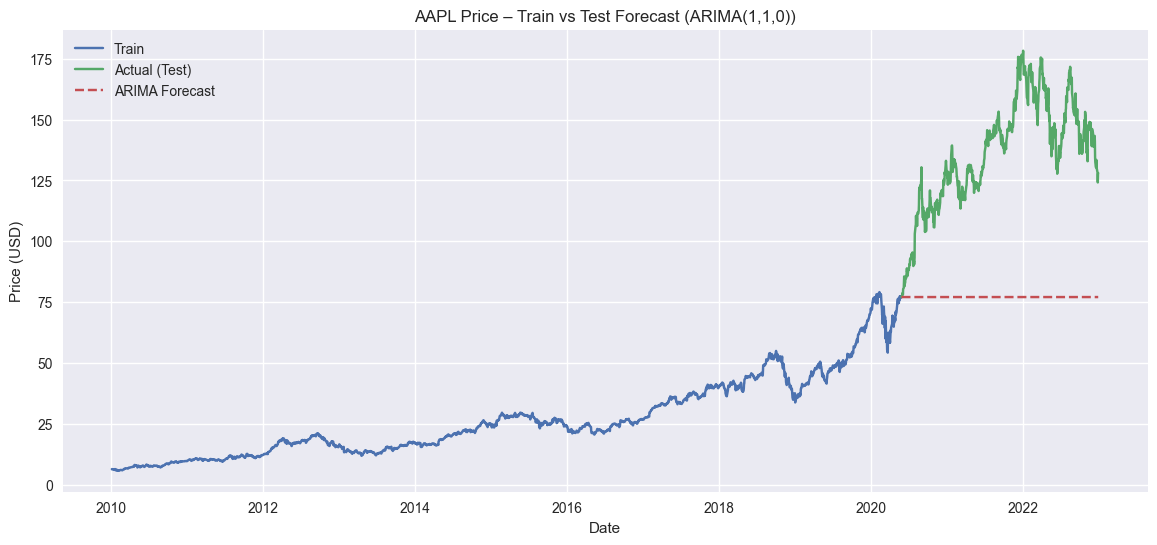

In [29]:
plt.figure(figsize=(14,6))

plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual (Test)")
plt.plot(forecast.index, forecast, label="ARIMA Forecast", linestyle="--")

plt.title("AAPL Price – Train vs Test Forecast (ARIMA(1,1,0))")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

series = close_prices["AAPL"]


model_full = ARIMA(series, order=(1, 1, 0))
model_full_fit = model_full.fit()

model_full_fit.summary()


c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                 3272
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5663.950
Date:                Fri, 21 Nov 2025   AIC                          11331.899
Time:                        13:21:39   BIC                          11344.085
Sample:                             0   HQIC                         11336.263
                               - 3272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.008     -7.023      0.000      -0.070      -0.039
sigma2         1.8687      0.017    109.979      0.000       1.835       1.902
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             24088.94
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              94.87   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

n_steps = 30

forecast_res = model_full_fit.get_forecast(steps=n_steps)

forecast_mean = forecast_res.predicted_mean

forecast_ci = forecast_res.conf_int()


c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:

last_date = series.index[-1]

future_dates = pd.date_range(start=last_date, periods=n_steps+1, freq="B")[1:]

forecast_mean.index = future_dates
forecast_ci.index = future_dates

forecast_mean.head()


2023-01-02    127.981756
2023-01-03    127.982697
2023-01-04    127.982646
2023-01-05    127.982649
2023-01-06    127.982648
Freq: B, Name: predicted_mean, dtype: float64

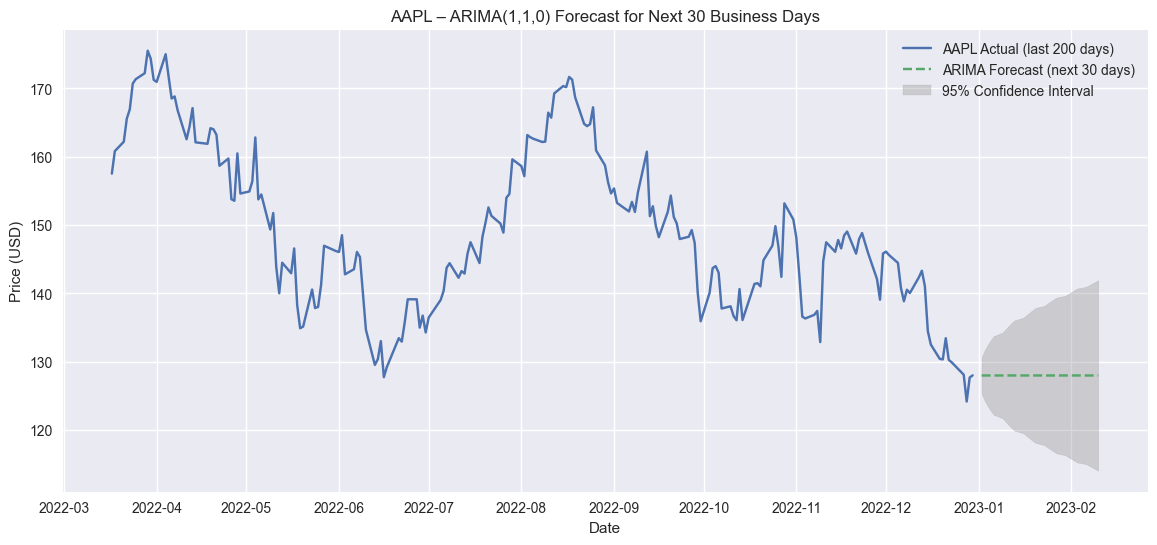

In [33]:
plt.figure(figsize=(14,6))

# Show last 200 days of actual prices
history_tail = series.iloc[-200:]
plt.plot(history_tail.index, history_tail.values, label="AAPL Actual (last 200 days)")

# Plot forecast
plt.plot(forecast_mean.index, forecast_mean.values, label="ARIMA Forecast (next 30 days)", linestyle="--")

# Plot confidence intervals as a shaded area
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],   # lower bound
    forecast_ci.iloc[:, 1],   # upper bound
    color="gray",
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.title("AAPL – ARIMA(1,1,0) Forecast for Next 30 Business Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
from prophet import Prophet


c:\Users\darak\OneDrive\Desktop\time-series-stock-forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [42]:

aapl_df = close_prices["AAPL"].reset_index()
aapl_df.columns = ["ds", "y"]

aapl_df.head()


,ds,y
0,2010-01-04,6.418381
1,2010-01-05,6.429482
2,2010-01-06,6.327213
3,2010-01-07,6.315513
4,2010-01-08,6.357500


In [ ]:

model_prophet = Prophet()

model_prophet.fit(aapl_df)


13:36:15 - cmdstanpy - INFO - Chain [1] start processing
13:36:16 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = model_prophet.make_future_dataframe(periods=60)

future.tail()


,ds
3327,2023-02-24
3328,2023-02-25
3329,2023-02-26
3330,2023-02-27
3331,2023-02-28


In [45]:
forecast = model_prophet.predict(future)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
3327,2023-02-24,174.307969,164.697633,183.605145
3328,2023-02-25,174.832150,165.383753,184.478269
3329,2023-02-26,174.712809,165.573222,184.007065
3330,2023-02-27,174.215158,164.540134,184.150473
3331,2023-02-28,174.047858,164.295884,183.720222


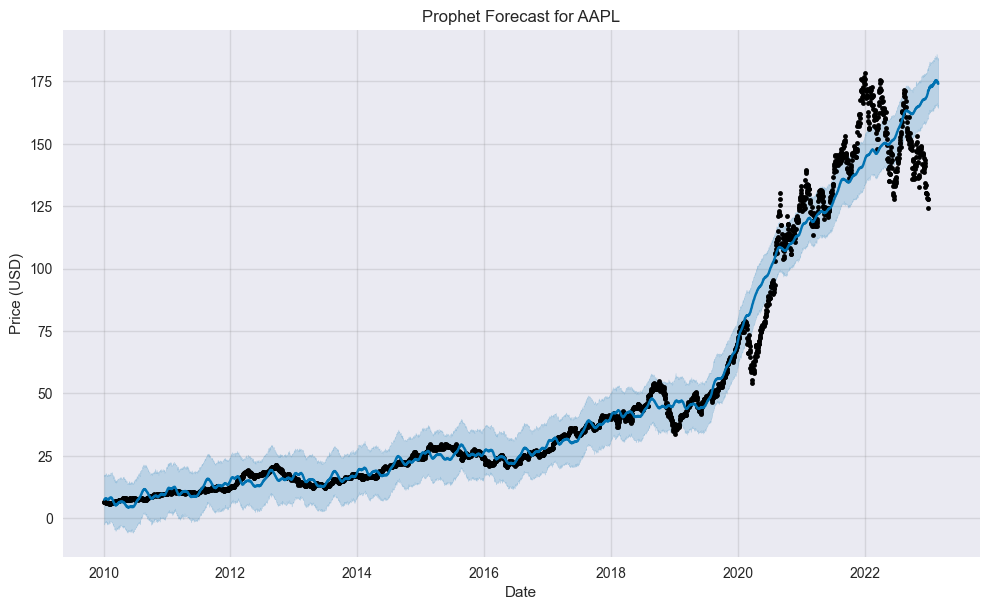

In [46]:
model_prophet.plot(forecast)
plt.title("Prophet Forecast for AAPL")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


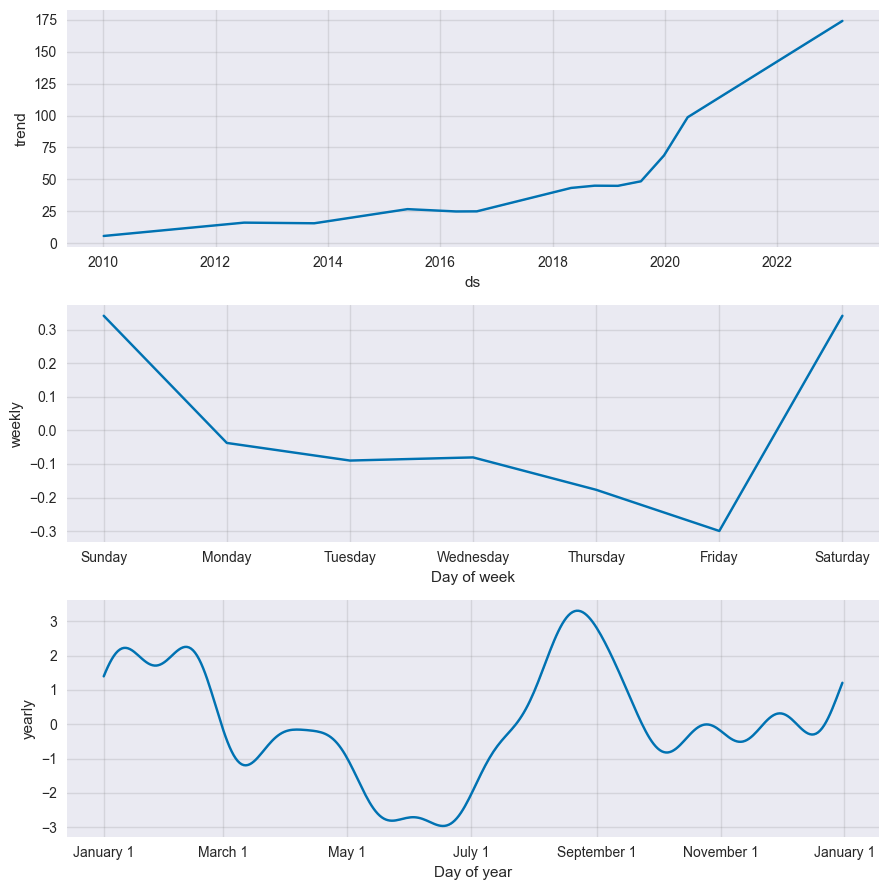

In [47]:
model_prophet.plot_components(forecast)
plt.show()
